In [1]:
!pip install shioaji
import numpy as np
import pandas as pd
import requests
import shioaji as sj
import matplotlib.pyplot as plt




2024-04-07 12:34:42.282 | WARNING  | importlib._bootstrap:_call_with_frames_removed:241 - Optional: pip install shioaji[speed] for better performance.


In [2]:
# 建立API物件，simulation=True是代表測試帳號
api = sj.Shioaji(simulation=True)
#登入你的key
accounts = api.login("DP6ayTE7r7zsyWfad4wfu5ZMDdQ4NA6wk1vPESXVihyG","65bqwy975DsaDHamDxje8M3yUyqKCEuNRA9szAkrt996")



accounts = api.list_accounts()
print(accounts)
#要下單的話要匯入憑證
# api.activate_ca(
#     ca_path="/c/your/ca/path/Sinopac.pfx",
#     ca_passwd="YOUR_CA_PASSWORD",
#     person_id="Person of this Ca",
# )

Response Code: 0 | Event Code: 0 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up
[FutureAccount(person_id='F129970274', broker_id='F002000', account_id='1809633', username='高誠鴻'), Account(account_type=<AccountType.H: 'H'>, person_id='F129970274', broker_id='9A95', account_id='01832712', username='高誠鴻'), StockAccount(person_id='F129970274', broker_id='9A95', account_id='2292673', signed=True, username='高誠鴻')]


In [4]:
print(api.Contracts)

Indexs=(OTC, TAIFEX, TSE) Stocks=(OES, OTC, TSE) Futures=(BRF, BTF, CAF, CBF, CCF, CDF, CEF, CFF, CGF, CHF, CJF, CKF, CLF, CMF, CNF, CQF, CRF, CSF, CUF, CWF, CXF, CYF, CZF, DAF, DBF, DCF, DDF, DEF, DFF, DGF, DHF, DIF, DJF, DKF, DLF, DNF, DO1, DOF, DPF, DQF, DSF, DVF, DWF, DXF, DYF, DZF, E4F, EEF, EGF, EHF, EKF, EMF, EPF, EXF, EYF, EZF, F1F, FBF, FCF, FE1, FEF, FFF, FGF, FKF, FNF, FQF, FRF, FSF, FTF, FVF, FWF, FXF, FYF, FZ1, FZF, G2F, GAF, GCF, GDF, GHF, GIF, GJF, GLF, GMF, GNF, GOF, GRF, GTF, GUF, GVF, GWF, GXF, GYF, GZF, HAF, HBF, HCF, HHF, HIF, HLF, HOF, HQF, HSF, IA1, IAF, IHF, IIF, IJF, IMF, IOF, IP1, IPF, IQF, IRF, ITF, IXF, IYF, IZF, JBF, JFF, JMF, JNF, JPF, JSF, JWF, JZ1, JZF, KAF, KBF, KCF, KDF, KEF, KFF, KG1, KGF, KIF, KKF, KLF, KOF, KPF, KSF, KUF, KWF, LBF, LCF, LEF, LIF, LMF, LOF, LQF, LRF, LTF, LUF, LVF, LWF, LXF, LYF, MAF, MBF, MJF, MKF, MQF, MVF, MX1, MX4, MXF, MYF, NAF, NBF, NDF, NEF, NGF, NIF, NJF, NLF, NMF, NOF, NQF, NSF, NUF, NVF, NWF, NYF, OAF, OBF, ODF, OEF, OHF, OJ

In [5]:
contract_2890 = api.Contracts.Stocks['2890']
print(contract_2890)

exchange=<Exchange.TSE: 'TSE'> code='2890' symbol='TSE2890' name='永豐金' category='17' unit=1000 limit_up=23.25 limit_down=19.05 reference=21.15 update_date='2024/03/22' day_trade=<DayTrade.Yes: 'Yes'>


In [3]:
# k棒的api使用方式
kbars = api.kbars(
    contract=api.Contracts.Stocks["2449"], 
    start="2024-01-01", 
    end="2024-03-21", 
)
df = pd.DataFrame({**kbars})
df.ts = pd.to_datetime(df.ts)
df.set_index('ts',inplace=True)

# 日k13:30的K棒
daily_df = df.resample('D').last().dropna()
daily_df

# 週k最後一天13:30的K棒
# weekly_df=df.resample('D').last().dropna()

# weekly_df

,Open,High,Low,Close,Volume,Amount
ts,,,,,,
2024-01-02,84.0,84.0,84.0,84.0,1174.0,98616000.0
2024-01-03,83.5,83.5,83.5,83.5,1027.0,85754500.0
2024-01-04,83.1,83.1,83.1,83.1,1449.0,120411900.0
2024-01-05,82.9,82.9,82.9,82.9,910.0,75439000.0
2024-01-08,81.6,81.6,81.6,81.6,1032.0,84211200.0
2024-01-09,82.1,82.1,82.1,82.1,672.0,55171200.0
2024-01-10,81.8,81.8,81.8,81.8,462.0,37791600.0
2024-01-11,78.0,78.0,78.0,78.0,2223.0,173394000.0
2024-01-12,75.6,75.6,75.6,75.6,1939.0,146588400.0


SDK NOTICE Sun Apr 07 13:02:07.664 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:50129'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 14:03:32.195 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:50564'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 14:06:09.522 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51269'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 14:08:14.504 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51287'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 14:22:22.868 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51303'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 14:31:31.770 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51331'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 14:36:39.315 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51369'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 14:54:28.196 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51386'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 15:05:48.903 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51413'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 15:09:03.799 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51439'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 15:12:11.423 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51463'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 15:16:45.853 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51500'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 15:18:27.726 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51525'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 15:25:12.561 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51538'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 15:43:50.315 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51555'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 16:00:19.809 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51578'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 16:18:13.992 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51612'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 16:34:05.311 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51675'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 16:52:48.249 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51720'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 17:11:09.176 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51753'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 17:26:59.534 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51796'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 17:42:06.788 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51840'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 17:59:21.246 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51868'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 18:16:53.490 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51896'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 18:33:07.814 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51936'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 18:50:27.561 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:51994'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 19:08:11.359 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52033'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 19:24:47.768 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52062'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 19:42:20.089 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52100'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 19:48:31.397 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52158'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 19:49:37.829 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52179'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 20:02:53.259 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52199'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 20:11:12.538 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52214'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 20:28:43.924 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52231'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 20:44:57.089 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52251'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 20:49:23.744 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52314'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 20:55:15.195 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52336'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 21:04:46.720 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52368'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 21:06:44.178 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52386'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 21:08:50.265 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52428'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 21:12:59.142 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52456'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 22:14:18.405 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:52488'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 22:32:11.951 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:53156'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 22:44:32.725 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:53187'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Sun Apr 07 23:55:33.374 2024 solClientOS.c:6131                   (1770b7000) TCP: Could not read from socket 84, error = Connection reset by peer (54)
SDK NOTICE Sun Apr 07 23:55:33.374 2024 solClientSmf.c:7959                  (1770b7000) Read failed from transport 'compression' of session '(c0,s1)_sinopac' due to 'TCP: Could not read from socket 84, error = Connection reset by peer (54)', client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:53226'


Response Code: 0 | Event Code: 12 | Info: TCP: Could not read from socket 84, error = Connection reset by peer (54) | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Mon Apr 08 00:00:08.287 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:53586'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Mon Apr 08 00:01:53.480 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:53594'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Mon Apr 08 00:23:02.589 2024 solClientOS.c:6131                   (1770b7000) TCP: Could not read from socket 84, error = Connection reset by peer (54)
SDK NOTICE Mon Apr 08 00:23:02.589 2024 solClientSmf.c:7959                  (1770b7000) Read failed from transport 'compression' of session '(c0,s1)_sinopac' due to 'TCP: Could not read from socket 84, error = Connection reset by peer (54)', client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:53618'


Response Code: 0 | Event Code: 12 | Info: TCP: Could not read from socket 84, error = Connection reset by peer (54) | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Mon Apr 08 00:24:39.617 2024 solClient.c:11120                    (1770b7000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 192.168.100.9:53785'


Response Code: 0 | Event Code: 12 | Info: Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/F129970274/0407/043506/574553/118.150.47.40', VPN name 'sinopac', peer host '203.66.91.161:80' address 'IP 203.66.91.161', connection 'tcp_TxRx' local address 'IP 1 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


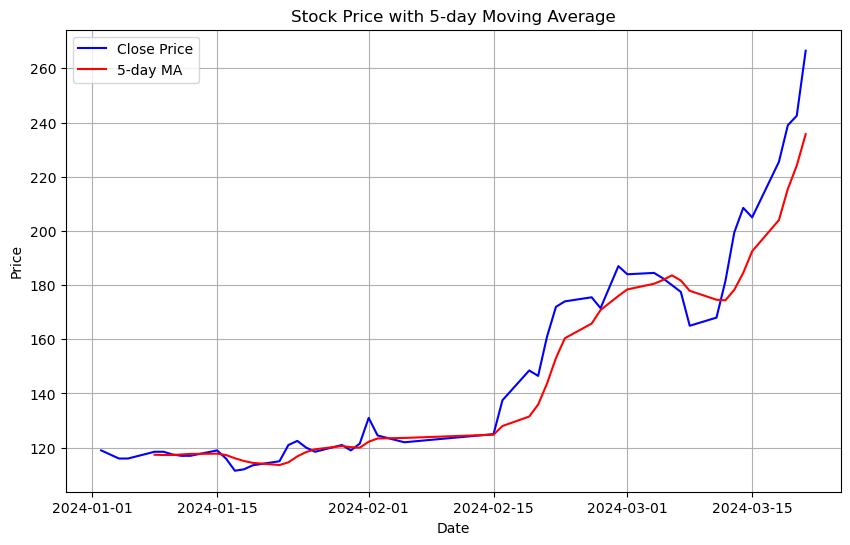

In [24]:
# 計算5日均線
daily_df['5MA'] = daily_df['Close'].rolling(window=5).mean()

# 繪製收盤價和5日均線
plt.figure(figsize=(10, 6))
plt.plot(daily_df.index, daily_df['Close'], label='Close Price', color='blue')
plt.plot(daily_df.index, daily_df['5MA'], label='5-day MA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 5-day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

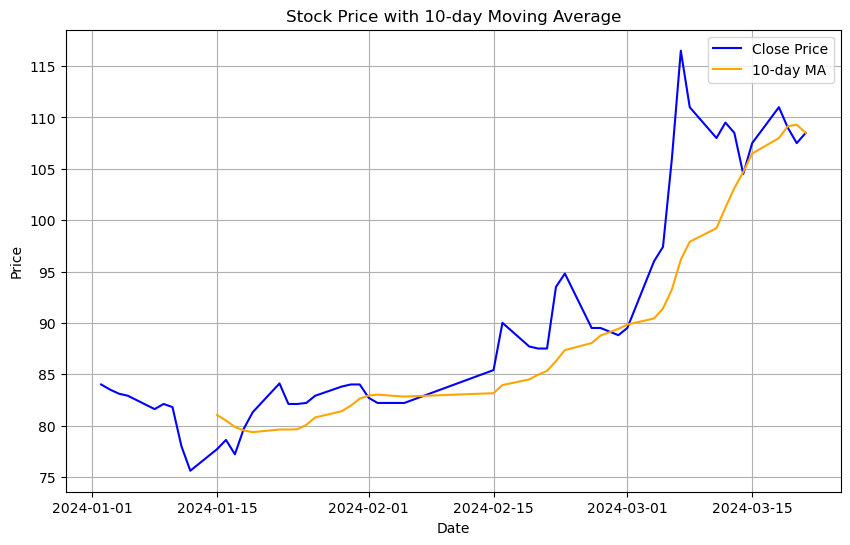

In [30]:
# 計算10日均線
daily_df['10MA'] = daily_df['Close'].rolling(window=10).mean()

# 繪製收盤價和10日均線
plt.figure(figsize=(10, 6))
plt.plot(daily_df.index, daily_df['Close'], label='Close Price', color='blue')
plt.plot(daily_df.index, daily_df['10MA'], label='10-day MA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 10-day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

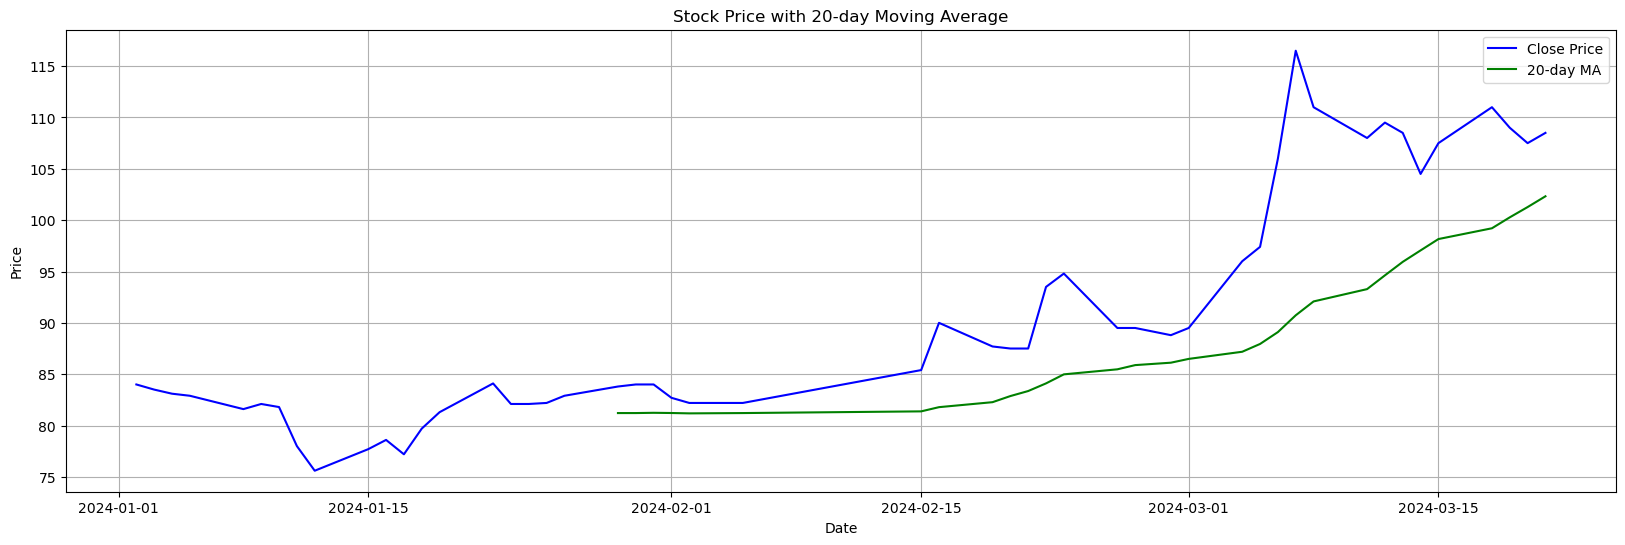

In [29]:
# 計算20日均線
daily_df['20MA'] = daily_df['Close'].rolling(window=20).mean()

# 繪製收盤價和20日均線
plt.figure(figsize=(20, 6))
plt.plot(daily_df.index, daily_df['Close'], label='Close Price', color='blue')
plt.plot(daily_df.index, daily_df['20MA'], label='20-day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 20-day Moving Average')
plt.legend()
plt.grid(True)
plt.show()